In [1]:
import pandas as pd
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_paths = os.listdir('images')
masks_paths = os.listdir('masks')

if len(image_paths) != len(masks_paths) : 
    print("ERROR")
else:
    print("data size : ", len(image_paths))

data size :  2667


In [3]:
data_csv = {"image":[], "mask":[]}
w = []
h = []
for idx in range(len(image_paths)):
    # image check
    image = cv2.imread('images/' + image_paths[idx])
    if image is None:
        continue
    w.append(image.shape[0])
    h.append(image.shape[1])

    mask = cv2.imread('masks/' + masks_paths[idx])
    if mask is None:
        continue
    data_csv["image"].append("datasets/images/"+image_paths[idx])
    data_csv["mask"].append("datasets/masks/"+masks_paths[idx])


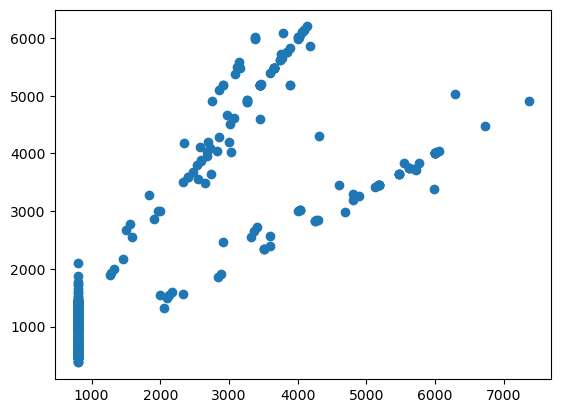

In [23]:
plt.scatter(w, h)
plt.show()

In [18]:
print('w avg : ', np.mean(w))
print('h avg : ', np.mean(h))


w avg :  975.1132358455193
h avg :  1171.2658417697787


In [5]:
data_csv = pd.DataFrame.from_dict(data_csv)
data_csv.head()

,image,mask
0,datasets/images/ds8_pexels-photo-91626.png,datasets/masks/ds8_pexels-photo-91626.png
1,datasets/images/ds2_pexels-photo-413793.png,datasets/masks/ds2_pexels-photo-413793.png
2,datasets/images/ds6_pexels-photo-322458.png,datasets/masks/ds6_pexels-photo-322458.png
3,datasets/images/ds2_man-stress-male-face.png,datasets/masks/ds2_man-stress-male-face.png
4,datasets/images/ds8_pexels-photo-841030.png,datasets/masks/ds8_pexels-photo-841030.png


In [6]:
# train valid 
rate = int(len(image_paths) * 0.2)
data_csv = data_csv.sample(frac = 1)

valid_data = data_csv[:-rate]
remove_index = list(valid_data.index)

train_data = data_csv.drop(index=remove_index)

print('train data size :', train_data.shape)
print('valid data size :', valid_data.shape)



train data size : (533, 2)
valid data size : (2134, 2)


In [7]:
train_data.to_csv("train.csv", index=False)
valid_data.to_csv("valid.csv", index=False)


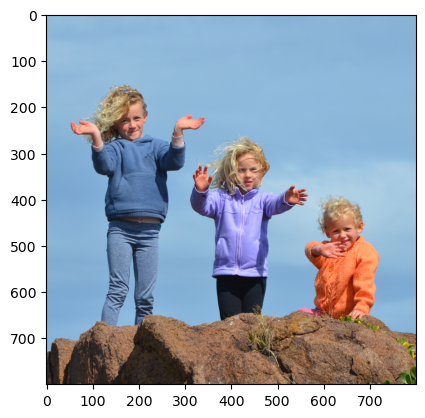

In [15]:
image = cv2.imread("images/ds12_pexels-photo-234544.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

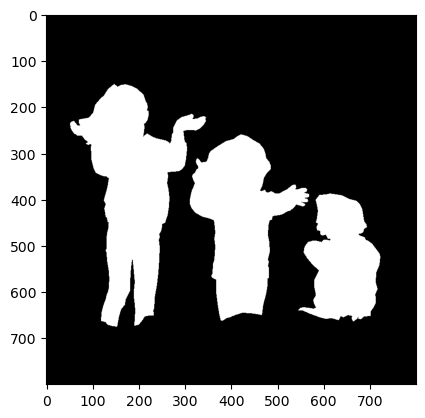

In [16]:
image = cv2.imread("masks/ds12_pexels-photo-234544.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)